In [1]:
import pandas as pd

# Read the CSV file into a DataFrame
df = pd.read_csv('C:/Users/sheth/Desktop/DSMP/simulated_transaction_2024.csv')

# Display the first few rows of the DataFrame
print(df.head())


         Date Timestamp   Account No  Balance  Amount  Third Party Account No  \
0  01/01/2023     00:00  678330503.0   2971.0  1584.0                     NaN   
1  01/01/2023     00:00  472213568.0   3792.0  1950.0                     NaN   
2  01/01/2023     00:00  472213568.0   3012.0  -780.0             283027736.0   
3  01/01/2023     00:00  283027736.0   1787.0   780.0             472213568.0   
4  01/01/2023     00:00  624500124.0   3226.0  1825.0                     NaN   

     Third Party Name  
0  Westport Care Home  
1    Barbiee Boutique  
2                 NaN  
3                 NaN  
4            Fat Face  


In [4]:
# Counting the number of transactions for each unique value in the 'Third party name' column
transaction_counts = df['Third Party Name'].value_counts()
pd.set_option('display.max_rows', None)
print(transaction_counts)

Third Party Name
Tesco                          34108
Sports Direct                  16259
Topshop                        10332
Fat Face                        9543
PureGym                         8293
Matalan                         8076
Netflix                         7780
Amazon                          7575
JustEat                         7162
Deliveroo                       6971
The Works                       6706
Five Senses Art                 5961
Revella                         5366
Starbucks                       4929
Blizzard                        4444
SquareOnix                      4387
Xbox                            4373
Mojang Studios                  4370
Disney                          3958
Blackwell's                     3853
Loosely Fitted                  3721
Grand Union BJJ                 3690
Sainsbury                       3298
Halifax                         3286
Selfridges                      3260
LBG                             3225
Sainsbury Local      

In [15]:

# Define a function to map Third party names to categories
def categorize(name):
    if name in ['Sports Direct', 'Topshop', 'Fat Face', 'Matalan', 'AMAZON', 'Blackwell\'s','Reebok', 'JD Sports', 'North Face', 'Boots', 'Lloyds Pharmacy']:
        return 'Retail Stores'
    elif name in ['Netflix', 'Disney', 'Blizzard', 'Mojang Studios', 'Amazon', 'Xbox', 'Gamestation']:
        return 'Entertainment & Media'
    elif name in ['Sainsbury', 'Tesco', 'Coop Local', 'Sainsbury Local']:
        return 'Grocery'
    elif name in ['JustEat', 'Deliveroo', 'Starbucks', 'Five Senses Art', 'Coffee #1', 'Costa Coffee', 'Jollyes']:
        return 'Food & Dining'
    elif name in ['Halifax', 'LBG', 'Premier Finance', 'CPA']:
        return 'Financial Services'
    elif name in ['PureGym', 'Grand Union BJJ', 'Selfridges', 'Lloyds Pharmacy', 'Vision Express', 'Pets Corner']:
        return 'Health & Wellness'
    elif name in ['Blackwell\'s', 'Brilliant Brushes','Craftastic', 'A Yarn Story', 'Cass Art', 'Foyles']:
        return 'Education & Books'
    elif name in ['The Works', 'Loosely Fitted', 'Wool', 'Hobby Lobby', 'Hobbycraft', 'Happy Days Home', 'Lavender Fields']:
        return 'Home & Lifestyle'
    else:
        return 'Other Services'

# Create a new column 'Category' based on the mapping function
df['Category'] = df['Third Party Name'].apply(categorize)

# Display the DataFrame with the new 'Category' column
print(df.head())


         Date Timestamp   Account No  Balance  Amount  Third Party Account No  \
0  01/01/2023     00:00  678330503.0   2971.0  1584.0                     NaN   
1  01/01/2023     00:00  472213568.0   3792.0  1950.0                     NaN   
2  01/01/2023     00:00  472213568.0   3012.0  -780.0             283027736.0   
3  01/01/2023     00:00  283027736.0   1787.0   780.0             472213568.0   
4  01/01/2023     00:00  624500124.0   3226.0  1825.0                     NaN   

     Third Party Name        Category  
0  Westport Care Home  Other Services  
1    Barbiee Boutique  Other Services  
2                 NaN  Other Services  
3                 NaN  Other Services  
4            Fat Face   Retail Stores  


In [16]:
# Filter rows where 'Category' is 'Other Services' and display all values
other_services_df = df[df['Category'] == 'Other Services']
print(other_services_df['Third Party Name'].unique())

['Westport Care Home' 'Barbiee Boutique' nan 'Lavender Primary'
 'A Cut Above' 'Fitted Stitch' 'The Crown' 'Green Park Academy'
 'Rose & Crown' 'Kings Arms' 'Sunny Care Nursery' 'Victoria Park'
 'SquareOnix' 'Revella' 'Stitch By Stitch' 'CeX' 'Etsy' 'Head'
 'Frankie & Bennies' 'Gap Kids' 'University College Hospital'
 'Pets at Home' 'Collector Cave' 'Green Park' 'Remedy plus care'
 'Town High' 'RugbyFields' 'Mamas & Papas' 'Specsavers' 'Kew House' 'HMV'
 'Millets' 'Mothercare' 'Mountain Warehouse']


In [17]:
''' 
The Crown       861
SquareOnix      4387
Revella         5366

'''

' \nThe Crown       861\nSquareOnix      4387\nRevella         5366\n\n'

In [20]:
# Create a new column 'Category' based on the mapping function
df['Category'] = df['Third Party Name'].apply(categorize)

# Convert 'Amount' column to numeric
df['Amount'] = pd.to_numeric(df['Amount'], errors='coerce')

# Group by 'Category' and calculate average, minimum, and maximum spends
category_stats = df.groupby('Category')['Amount'].agg(['mean', 'min', 'max'])

# Display the statistics
print(category_stats)

# Function to get details of the transaction with minimum spend
def get_min_transaction_details(group):
    min_transaction = group.loc[group['Amount'] == group['Amount'].min()]
    return min_transaction[['Third Party Name', 'Amount']]

# Function to get details of the transaction with maximum spend
def get_max_transaction_details(group):
    max_transaction = group.loc[group['Amount'] == group['Amount'].max()]
    return max_transaction[['Third Party Name', 'Amount']]

# Get details of transactions with min and max spends for each category
min_transaction_details = df.groupby('Category').apply(get_min_transaction_details)
max_transaction_details = df.groupby('Category').apply(get_max_transaction_details)

# Display the statistics and transaction details
for category, stats in category_stats.iterrows():
    print(f"Category: {category}")
    print(f"Average Spend: {stats['mean']:.2f}")
    print(f"Minimum Spend: {stats['min']:.2f}")
    print("Details of Minimum Spend Transaction:")
    print(min_transaction_details.loc[category])
    print(f"Maximum Spend: {stats['max']:.2f}")
    print("Details of Maximum Spend Transaction:")
    print(max_transaction_details.loc[category])
    print("\n")

                             mean       min       max
Category                                             
Education & Books      255.676143   -250.00   2970.00
Entertainment & Media  -13.469336   -180.00   2790.00
Financial Services    -211.085043  -1395.00   5833.00
Food & Dining            4.039314   -150.27   3333.33
Grocery                -52.971540   -348.35   2780.00
Health & Wellness       43.215634   -368.20   4167.00
Home & Lifestyle        53.522854   -371.00   2970.00
Other Services         204.370741 -12240.00  12240.00
Retail Stores          -34.097824   -429.80   4167.00
Category: Education & Books
Average Spend: 255.68
Minimum Spend: -250.00
Details of Minimum Spend Transaction:
       Third Party Name  Amount
164279       Craftastic  -250.0
Maximum Spend: 2970.00
Details of Maximum Spend Transaction:
       Third Party Name  Amount
412          Craftastic  2970.0
22113        Craftastic  2970.0
40158        Craftastic  2970.0
57864        Craftastic  2970.0
75708     

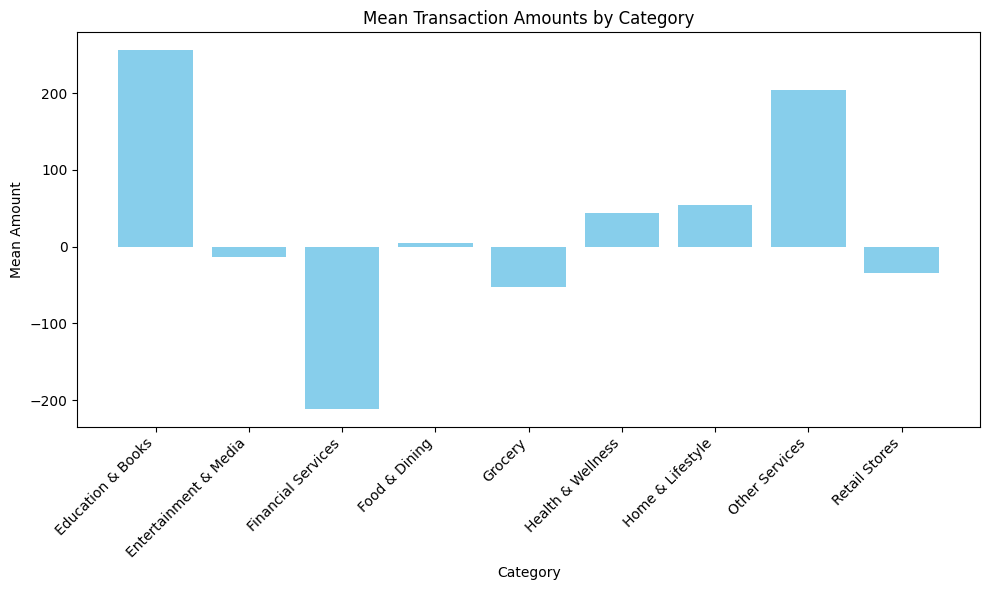

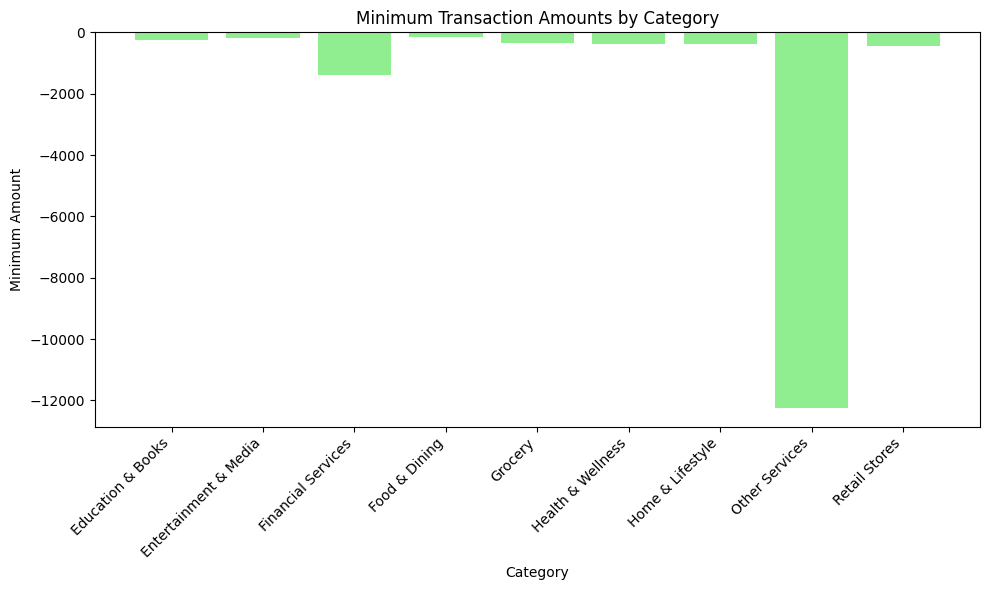

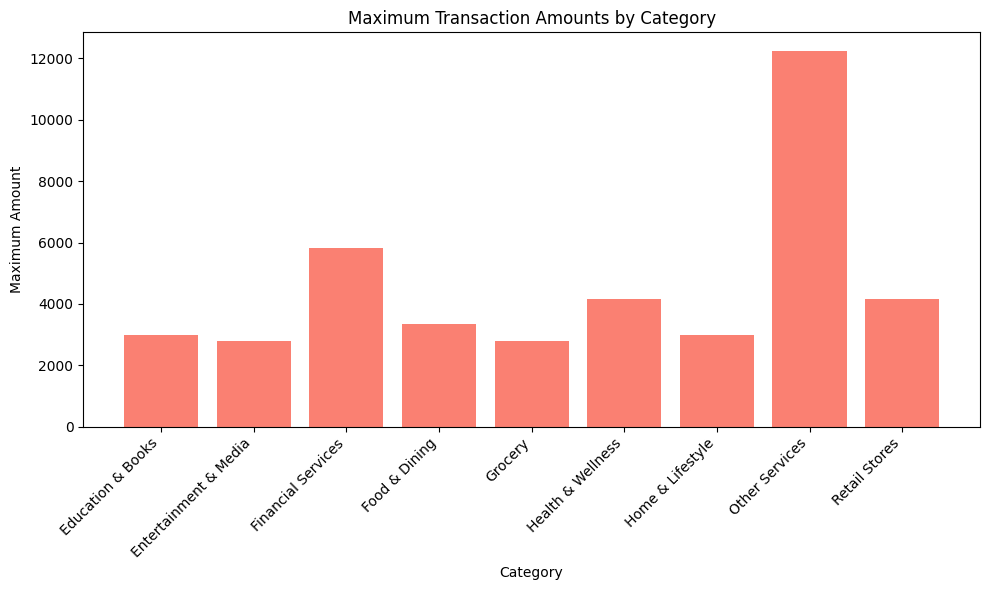

In [27]:
import pandas as pd
import matplotlib.pyplot as plt

# Group by 'Category' and calculate statistics for each category
category_stats = df.groupby('Category')['Amount'].agg(['mean', 'min', 'max']).round(2)

# Plot mean
plt.figure(figsize=(10, 6))
plt.bar(category_stats.index, category_stats['mean'], color='skyblue')
plt.title('Mean Transaction Amounts by Category')
plt.xlabel('Category')
plt.ylabel('Mean Amount')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

# Plot min
plt.figure(figsize=(10, 6))
plt.bar(category_stats.index, category_stats['min'], color='lightgreen')
plt.title('Minimum Transaction Amounts by Category')
plt.xlabel('Category')
plt.ylabel('Minimum Amount')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

# Plot max
plt.figure(figsize=(10, 6))
plt.bar(category_stats.index, category_stats['max'], color='salmon')
plt.title('Maximum Transaction Amounts by Category')
plt.xlabel('Category')
plt.ylabel('Maximum Amount')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


In [24]:
# Convert 'Amount' column to numeric
df['Amount'] = pd.to_numeric(df['Amount'], errors='coerce')


# Group by 'Category' and calculate variance for each category
category_variance = df.groupby('Category')['Amount'].var()

# Round the variance values to three decimal places
category_variance = category_variance.round(3)

# Display the variance for each category
print(category_variance)

Category
Education & Books         509249.347
Entertainment & Media       9213.404
Financial Services       2309590.214
Food & Dining              58000.094
Grocery                    31809.992
Health & Wellness         210780.442
Home & Lifestyle          160305.674
Other Services            928928.756
Retail Stores             114519.457
Name: Amount, dtype: float64


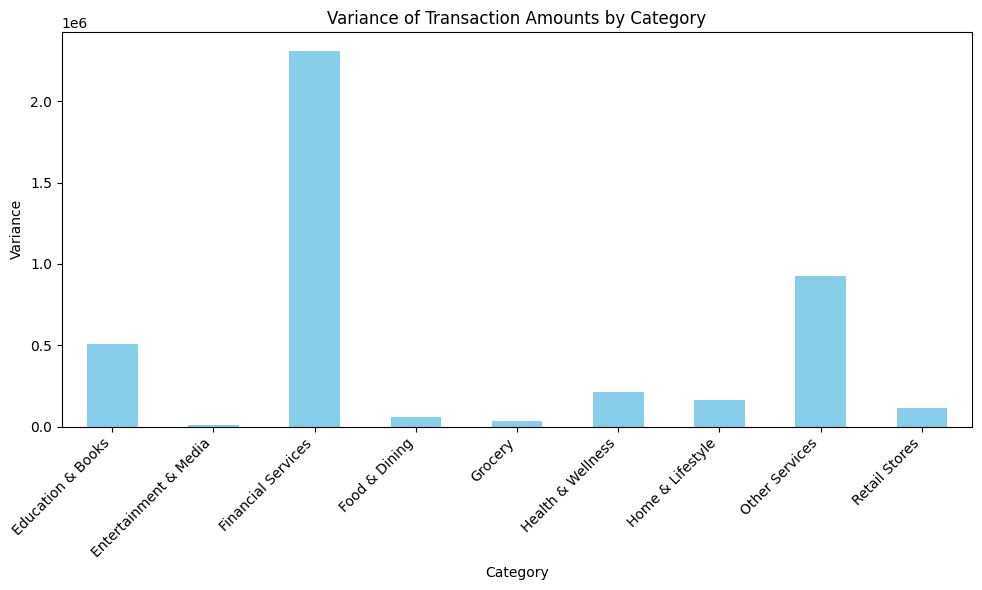

In [25]:
import pandas as pd
import matplotlib.pyplot as plt

# Group by 'Category' and calculate variance for each category
category_variance = df.groupby('Category')['Amount'].var().round(3)

# Plot variances
category_variance.plot(kind='bar', color='skyblue', figsize=(10, 6))
plt.title('Variance of Transaction Amounts by Category')
plt.xlabel('Category')
plt.ylabel('Variance')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()